<a href="https://colab.research.google.com/github/BhuvanJoshi007/British_Airways_Topic_modelling/blob/main/getting_started_LDA_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import nltk
import gensim
import spacy

In [ ]:
# Sklearn

# main package
# Dimensionality reduction using truncated singular value decomposition
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

# CountVectorizer -> instead of frequency, put binary
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import GridSearchCV

# clean printing
from pprint import pprint

In [ ]:
# Sklearn

# main package
# Dimensionality reduction using truncated singular value decomposition
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

# CountVectorizer -> instead of frequency, put binary
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import GridSearchCV

# clean printing
from pprint import pprint

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | British Airways has confirmed ...
1,✅ Trip Verified | Worst BA experience. I was s...
2,✅ Trip Verified | My daughter and I were deni...
3,✅ Trip Verified | Despite boarding being the u...
4,"Not Verified | Flight cancelled, no crew! 9th..."


In [ ]:
def remove_trip_verified(df):
    df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '')
    df['reviews'] = df['reviews'].str.replace('Not Verified | ', '')
    return df

df = remove_trip_verified(df.copy())
print(df)

                                               reviews
0    NotVerified|BritishAirwayshasconfirmeditselfas...
1    |WorstBAexperience.IwassupposedtoflyouttoItaly...
2    |MydaughterandIweredeniedboardingonourbusiness...
3    |DespiteboardingbeingtheusualfreeforallatLHRwi...
4    NotVerified|Flightcancelled,nocrew!9thSeptembe...
..                                                 ...
995  |BostontoNairobiviaLondon.Theonlygoodthingwast...
996  |BaseltoSanFransiscoviaHeathrow.I'mconvincedth...
997  |LondontoLyon.Theflighthas1h30delayforaflightd...
998  |LondontoBoston.Iwasseatednexttoacustomerwhowa...
999  |StockholmtoLondon.Standardconfigurationonshor...

[1000 rows x 1 columns]


<ipython-input-7-17a83ff6dc1f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '')
<ipython-input-7-17a83ff6dc1f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('Not Verified | ', '')


In [ ]:
df

,reviews
0,NotVerified|BritishAirwayshasconfirmeditselfas...
1,|WorstBAexperience.IwassupposedtoflyouttoItaly...
2,|MydaughterandIweredeniedboardingonourbusiness...
3,|DespiteboardingbeingtheusualfreeforallatLHRwi...
4,"NotVerified|Flightcancelled,nocrew!9thSeptembe..."
...,...
995,|BostontoNairobiviaLondon.Theonlygoodthingwast...
996,|BaseltoSanFransiscoviaHeathrow.I'mconvincedth...
997,|LondontoLyon.Theflighthas1h30delayforaflightd...
998,|LondontoBoston.Iwasseatednexttoacustomerwhowa...


In [ ]:
df.describe()

,reviews
count,1000
unique,1000
top,NotVerified|BritishAirwayshasconfirmeditselfas...
freq,1


## Text preprocessing

### 1. Converting our documents into lower case


In [ ]:
reviews_lc = []

# Convert and append each element to the lowercase_list
for doc in reviews:
    reviews_lc.append(doc.lower())
reviews_lc

In [ ]:
# Remove the specified substrings from each element "✅ Trip Verified |" & "Not Verified |".

a="✅ trip verified |"
b="not verified |"
#reviews_lc = [doc.replace(a, "").replace(b, "") for doc in reviews_lc]
#reviews_lc

reviews_lc1=[]
for doc in reviews_lc:
    reviews_lc1.append(doc.replace(a, "").replace(b, ""))


In [ ]:
## remove punctuation marks

import string

# Step 1: Create a translation table to remove punctuation and special characters
translator = str.maketrans('', '', string.punctuation)
# Step 2: Remove punctuation and special characters from each document
reviews_lc1 = [doc.translate(translator) for doc in reviews_lc1]

In [ ]:
# remove non-breaking space "\xa0", "\r" & "\n"
reviews_lc1 = [doc.replace("\xa0"," ").replace("’"," ") for doc in reviews_lc1]

In [ ]:
# removing repeatetive words related to company British Airways
variations = [r'British Airways',r'british airways',r'BritishAirways',r'britishairways',r'British Air',r'british air',
              r'british airway',r'British Airway',r'BritishAirway',r'britishairway', r'ba',r'BA',r'b a', r'B A']
pattern = '|'.join(variations)
cleaned_documents = []
for document in reviews_lc1:
    cleaned_document = re.sub(pattern, '', document)
    cleaned_documents.append(cleaned_document)

In [ ]:
cleaned_documents

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')# Download the stop words if not already downloaded
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
final_documents = []
for x in cleaned_documents:
    filtered_words=[]
    words= nltk.word_tokenize(x)
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    filtered_text = ' '.join(filtered_words)
    final_documents.append(filtered_text)

In [ ]:
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in cleaned_documents]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]

pprint(data[:1])

[' has confirmed itself as the worst airline in the uk last minute '
 'cancellation no explanation refusal to book with another airline “because we '
 'don t have an arrangement with them” what s happened to what used to be our '
 'national airline']


In [ ]:
len(data[:1])

1

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),
                                             deacc=True)) # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['has', 'confirmed', 'itself', 'as', 'the', 'worst', 'airline', 'in', 'the', 'uk', 'last', 'minute', 'cancellation', 'no', 'explanation', 'refusal', 'to', 'book', 'with', 'another', 'airline', 'because', 'we', 'don', 'have', 'an', 'arrangement', 'with', 'them', 'what', 'happened', 'to', 'what', 'used', 'to', 'be', 'our', 'national', 'airline']]


#### Lemmatization

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal/CMD first: python -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_
                                   if token.lemma_ not in ['-PRON-']
                                   else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [ ]:
data_lemmatized = lemmatization(data_words,
                                allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
import pickle
pickle_out = open("data_lemmatized_save.pickle","wb")
pickle.dump(data_lemmatized, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("data_lemmatized_save.pickle","rb")
data_lemmatized = pickle.load(pickle_in)
data_lemmatized[2]

'daughter deny boarding business class flight heathrow first leg return flight reason give deny boarding check staff counter say only agent tell call hour early flight valid passport many try finally reach phone tell call expedia book flight expedia confirm bump flight explanation expedia then begin long process find alternative flight next hour numerous call expedia incredibly next available flight day later almost unbelievable many many try good even business class ticket part problem apparently rule allow change route segment flight day delay major problem miss work daughter miss school far receive compensation penalty fee reimbursement expense stay extra day return begin online complaint process submit support document receive email reply case reference number then send numerous follow email receive reply now month later still hear shocking definitely bad airline service receive thousand flight many decade very patient person first time comment type forum think public make aware ex

In [ ]:
data_lemmatized[:1]

['confirm bad airline last minute cancellation explanation refusal book airline don arrangement happen use national airline']

**Create the Document-Word matrix**

The LDA topic model algorithm requires a document word matrix as the main input.

You can create one using CountVectorizer.

- consider words that has occurred at least 10 times (min_df),
- remove built-in english stopwords,
- convert all words to lowercase,
- and a word can contain numbers and alphabets of at least length 3 in order to be qualified as a word.



In [ ]:
vectorizer = CountVectorizer(analyzer='word',
                             min_df=10,                        # minimum reqd occurences of a word
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [ ]:
# Build LDA model with sklearn
# Everything is ready to build a Latent Dirichlet Allocation (LDA) model. Let’s initialise one and call fit_transform()
# to build the LDA model.

# For this example, I have set the n_topics as 20 based on prior knowledge about the dataset.
# Later we will find the optimal number using grid search.

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -284879.6868468502
Perplexity:  467.3447919365945
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [ ]:
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -64972.367493105565
Model Perplexity:  430.5709783828675


In [ ]:
best_lda_model.n_topics = 10

In [ ]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.01,0.01,0.01,0.01,0.01,0.01,0.94,0.01,0.01,0.01,6
Doc1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,8
Doc2,0.00,0.00,0.00,0.00,0.00,0.10,0.04,0.00,0.33,0.53,9
Doc3,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
Doc4,0.01,0.01,0.01,0.01,0.01,0.01,0.35,0.31,0.01,0.31,6


In [ ]:
# Review topics distribution across documents

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution.sort_values(by = "Topic Num").reset_index(drop=True)

,Topic Num,Num Documents
0,0,21
1,1,53
2,2,192
3,3,51
4,4,120
5,5,149
6,6,57
7,7,70
8,8,130
9,9,157


In [ ]:
df_topic_distribution= df_topic_distribution.sort_values(by = "Topic Num").reset_index(drop=True)
df_topic_distribution

,Topic Num,Num Documents
0,0,21
1,1,53
2,2,192
3,3,51
4,4,120
5,5,149
6,6,57
7,7,70
8,8,130
9,9,157


In [ ]:
# Topic-Keyword Matrix
df_topic_keyword_m = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keyword_m.columns = vectorizer.get_feature_names_out()
df_topic_keyword_m.index = topicnames

# View
df_topic_keyword_m

,able,absolute,absolutely,accept,acceptable,access,accommodation,account,act,actually,...,wonderful,word,work,world,worth,write,wrong,year,yesterday,young
Topic0,7.313290,0.100028,0.100075,0.100001,0.100084,0.100000,0.100000,0.100043,3.100035,0.100053,...,0.100007,0.100018,0.100042,4.256986,0.100013,0.100003,0.100003,2.837213,0.100000,3.776561
Topic1,0.100017,1.690405,2.636701,0.100010,1.897888,1.481882,0.100000,0.100006,0.100001,1.944785,...,0.100008,0.100003,0.277275,3.270782,7.848028,1.552522,3.881368,0.209793,0.100000,0.100006
Topic2,6.575287,0.100008,0.100043,0.100022,1.519642,9.574888,0.100000,1.198581,0.100053,6.912691,...,6.470229,0.100011,39.158642,64.034545,6.033698,0.100007,2.316705,2.886254,0.100014,3.887748
Topic3,0.100041,3.281944,0.100060,0.100021,0.100000,3.709831,0.100016,0.100019,2.149452,4.733707,...,12.729711,0.100014,10.784139,0.100009,0.100025,10.506583,0.100005,0.102239,0.155172,6.249753
Topic4,1.512880,0.100003,2.788621,0.100012,3.214777,4.531534,0.100011,0.100023,0.100033,1.744114,...,0.100011,0.100023,39.386387,5.436455,8.863449,4.344047,0.100035,16.408448,0.100022,0.149169
Topic5,5.164334,0.100000,2.605327,4.992471,11.654107,5.607998,1.124368,0.100022,1.629616,15.377956,...,0.100011,6.411981,16.931422,23.765383,14.402168,0.100034,0.100028,25.092564,1.569013,3.436737
Topic6,4.750763,3.334834,7.816225,0.100038,0.100016,0.100008,3.952801,0.100000,0.100034,0.100008,...,0.100007,0.100007,11.793385,5.514691,0.224969,3.570861,0.100025,78.831111,2.912102,0.100003
Topic7,13.092503,3.917867,8.483141,2.281420,1.213433,0.907356,0.100031,0.100017,3.520749,0.100034,...,0.100009,2.831507,27.141892,0.100007,0.100036,0.100020,4.596456,6.241896,4.898980,0.100009
Topic8,23.971945,1.274894,2.456759,5.382050,0.100031,0.100018,8.001599,4.010340,0.100011,4.958035,...,0.100005,0.100006,10.032282,0.858552,4.227561,0.100023,0.100098,1.361187,1.964682,0.100011
Topic9,10.418939,0.100017,10.913048,24.743954,0.100022,4.886484,4.321174,7.090946,0.100016,8.028617,...,0.100001,5.056429,24.394535,1.662590,0.100052,9.525900,24.605279,13.029296,0.100015,0.100003


In [ ]:
# Show top n keywords for each topic
def show_topic(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topic(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,try,help,say,need,travel,ask,lady,customer,time,make,trip,change,number,covid,service
Topic 1,seat,economy,flight,premium,pay,cabin,sit,passenger,check,leg,plane,class,attendant,business,staff
Topic 2,flight,good,time,crew,food,service,cabin,club,lounge,new,seat,boarding,experience,comfortable,drink
Topic 3,flight,crew,service,cabin,great,thank,good,seat,staff,food,make,friendly,fly,amazing,feel
Topic 4,seat,flight,food,crew,fly,cabin,hour,drink,offer,entertainment,just,meal,leg,long,service
Topic 5,class,business,seat,service,flight,food,meal,staff,passenger,drink,offer,lounge,cabin,ask,club
Topic 6,airline,flight,year,fly,experience,cancel,class,business,time,pay,use,book,make,travel,old
Topic 7,staff,flight,check,hour,plane,service,passenger,boarding,wait,tell,just,gate,time,airport,minute
Topic 8,flight,hour,delay,arrive,day,tell,check,miss,time,heathrow,fly,late,wait,connect,airport
Topic 9,flight,customer,refund,book,cancel,service,ticket,email,phone,pay,tell,day,change,say,travel




```
# This is formatted as code
```

#### Manually naming the topic

In [ ]:
topic_namedict = {0:"Customer Service and Travel Support During COVID-19",
                  1:"Airline Seating and Passenger Experience",
                  2:"In-Flight Comfort and Service Experience",
                  3:"Positive Passenger Experiences and Appreciation",
                  4:"In-Flight Comfort and Services",
                  5:"Business Class Experience and Services",
                  6:"Airline Booking and Travel Experiences",
                  7:"Airport Check-In and Boarding Experience",
                  8:"Flight Delays and Airport Experiences",
                  9:"Flight Booking, Changes, and Customer Service"}

In [ ]:
type(topic_namedict.keys())

dict_keys

In [ ]:
df_topic_distribution['Topic_name'] = df_topic_distribution['Topic Num'].map(topic_namedict)
df_topic_distribution

,Topic Num,Num Documents,Topic_name
0,0,21,Customer Service and Travel Support During COV...
1,1,53,Airline Seating and Passenger Experience
2,2,192,In-Flight Comfort and Service Experience
3,3,51,Positive Passenger Experiences and Appreciation
4,4,120,In-Flight Comfort and Services
5,5,149,Business Class Experience and Services
6,6,57,Airline Booking and Travel Experiences
7,7,70,Airport Check-In and Boarding Experience
8,8,130,Flight Delays and Airport Experiences
9,9,157,"Flight Booking, Changes, and Customer Service"


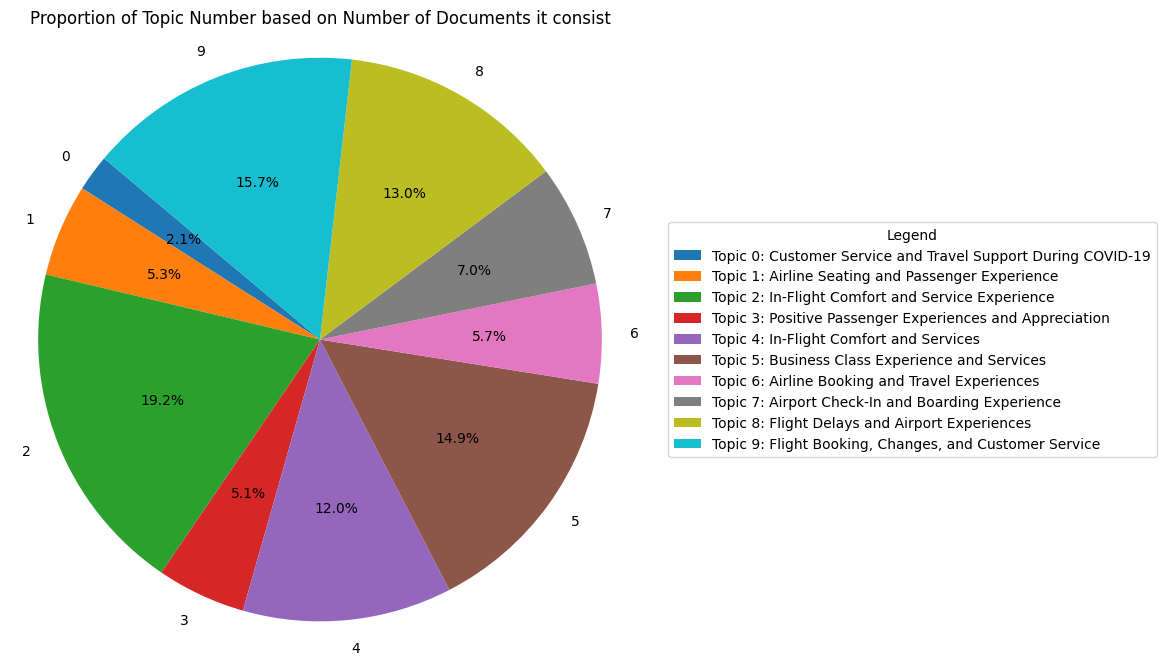

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "Topic Num", "Num Documents", and "Topic_name"

# Extract data from the DataFrame
topic_nums = df_topic_distribution['Topic Num']
num_documents = df_topic_distribution['Num Documents']
topic_names = df_topic_distribution['Topic_name']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(num_documents, labels=topic_nums, autopct='%1.1f%%', startangle=140)

# Create a legend mapping "Topic Num" to "Topic_name" and move it to the right of the pie chart
legend_labels = [f"Topic {topic_num}: {topic_name}" for topic_num, topic_name in zip(topic_nums, topic_names)]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1.05, 0.5), title="Legend")

# Set the title
plt.title("Proportion of Topic Number based on Number of Documents it consist")

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


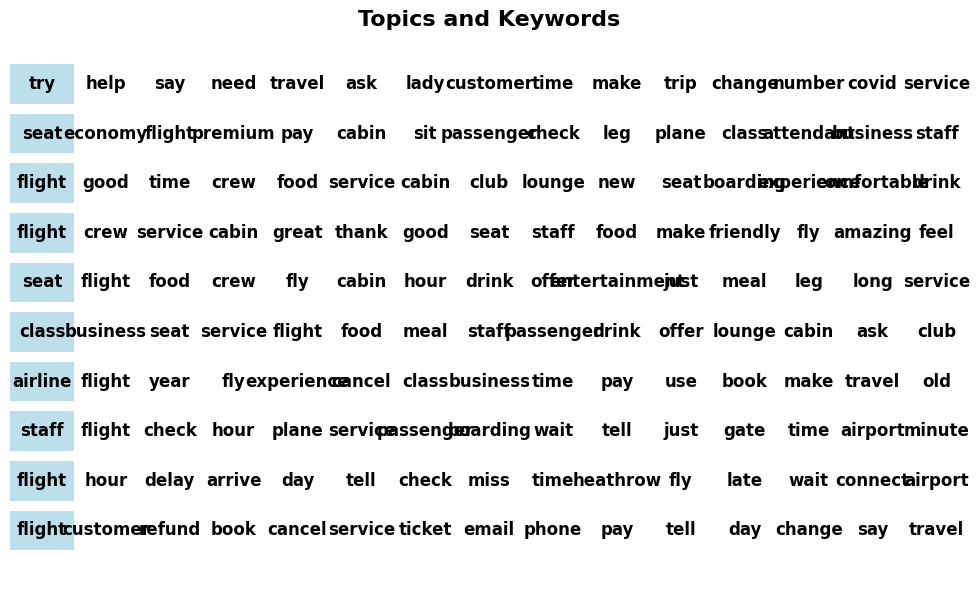

In [ ]:
# DataFrame named df_topic_keywords with topics in rows and words in columns

# Set the figure size to make the visualization more appealing
plt.figure(figsize=(10, 6))

# Iterate through each row (topic) in the DataFrame
for index, row in df_topic_keywords.iterrows():
    # Extract the words for the current topic
    topic_words = row.tolist()

    # Create a horizontal bar graph with one bar representing the current topic
    plt.barh(index, width=1, color='lightblue', alpha=0.8)

    # Plot the words on the bar
    for i, word in enumerate(topic_words):
        plt.text(x=i + 0.5, y=index, s=word, va='center', ha='center', fontsize=12, fontweight='bold', color='black')

# Customize the appearance of the plot
plt.xlim(0, len(df_topic_keywords.columns))  # Adjust the x-axis limits
plt.ylim(-1, len(df_topic_keywords))  # Adjust the y-axis limits
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.axis('off')  # Hide the axis
plt.title("Topics and Keywords", fontsize=16, fontweight='bold')  # Set the plot title

# Show the plot
plt.tight_layout()
plt.show()


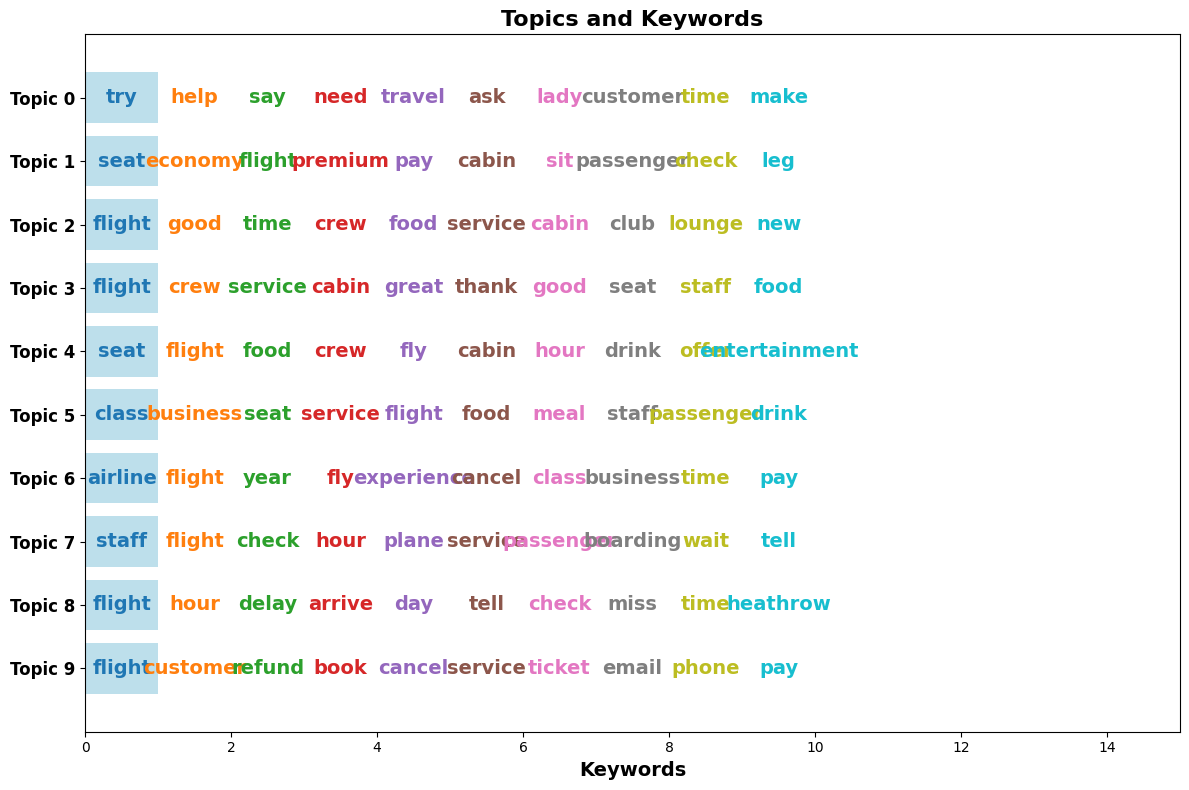

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import warnings



# Assuming you have a DataFrame named df_topic_keywords with topics in rows and words in columns

# Set the figure size to make the visualization more appealing
plt.figure(figsize=(12, 8))

# Define colors for words
word_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Iterate through each row (topic) in the DataFrame
for index, row in df_topic_keywords.iterrows():
    # Extract the words for the current topic
    topic_words = row.tolist()

    # Create a horizontal bar graph with one bar representing the current topic
    plt.barh(index, width=1, color='lightblue', alpha=0.8)

    # Plot the words on the bar with different colors and font styles
    for i, (word, color) in enumerate(zip(topic_words, word_colors)):
        plt.text(x=i + 0.5, y=index, s=word, va='center', ha='center',
                 fontsize=14, fontweight='bold', color=color, fontname='Arial')

# Customize the appearance of the plot
plt.xlim(0, len(df_topic_keywords.columns))  # Adjust the x-axis limits
plt.ylim(-1, len(df_topic_keywords))  # Adjust the y-axis limits
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.yticks(np.arange(len(df_topic_keywords)), df_topic_keywords.index, fontsize=12, fontweight='bold')
plt.xlabel("Keywords", fontsize=14, fontweight='bold')
plt.title("Topics and Keywords", fontsize=16, fontweight='bold')  # Set the plot title

# Show the plot
plt.tight_layout()
plt.show()

warnings.filterwarnings('ignore')

In [ ]:
df_topic_keywords

,Topic 0,Topic 1,Topic 2
Topic Name 0,word1,word4,word7
Topic Name 1,word2,word5,word8
Topic Name 2,word3,word6,word9


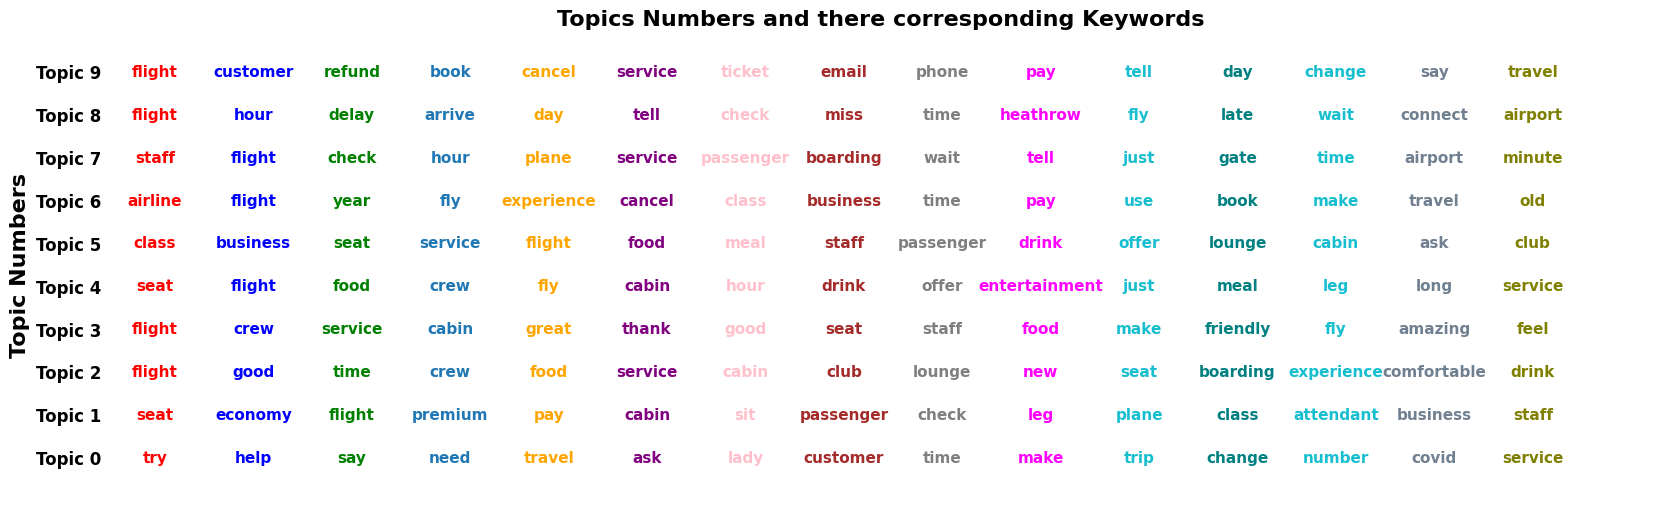

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 6))

# Set the topic names as y-tick labels
y_pos = np.arange(len(df_topic_keywords))
ax.set_yticks(y_pos)
ax.set_yticklabels(df_topic_keywords.index, fontsize=12, fontweight='bold')

# Hide the x-axis and x-labels
ax.get_xaxis().set_visible(False)

# Customize the appearance of the plot
colors = ["Red", "Blue", "Green", "#1f77b4", "Orange","Purple", "Pink", "Brown", "#7f7f7f", "Magenta","#17becf", "Teal", "#17becf", "SlateGray", "Olive"]

for i, (topic, words) in enumerate(df_topic_keywords.iteritems()):
    ax.barh(y_pos, [1] * len(df_topic_keywords), left=i, color='white', align='center', label=topic)
    for y, word in zip(y_pos, words):
        ax.text(i + 0.5, y, word, ha='center', va='center', fontsize=11, fontweight='bold', color = colors[i])

# Title and axis labels
ax.set_title("Topics Numbers and there corresponding Keywords", fontsize=16, fontweight='bold')
ax.set_ylabel("Topic Numbers", fontsize=16, fontweight='bold')

# Remove the bars (make them invisible)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)

plt.show()